<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-2/aulas/notebooks/aula_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Obtendo dados de aulas anteriores

Para melhor organização e reprodução, todos os dados das aulas são retirados [deste repositório](https://github.com/matheus97eng/Bootcamp_Alura_2021/tree/main/modulo-2/aulas/data). Lá você também encontra a descrição de cada um deles. Vamos transformá-los novamente em dataframes.

In [ ]:
import pandas as pd

dados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_ordenado_por_total%20(1).csv'
ordenado_por_total = pd.read_csv(dados, index_col='Unidade da Federação')
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,2.106115e+08,2.290870e+08,2.215980e+08,2.413999e+08,2.298212e+08,2.507936e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077389e+08,1.031408e+08,1.110660e+08,1.060943e+08,1.154872e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43

# Aula 3 - Ticks, escalas e formatação

Vamos trabalhar novamente com o dataframe `ordenado_por_total`. Tentaremos primeiro um gráfico do tipo scatterplot para visualizar os gastos de São Paulo ao longo dos meses.

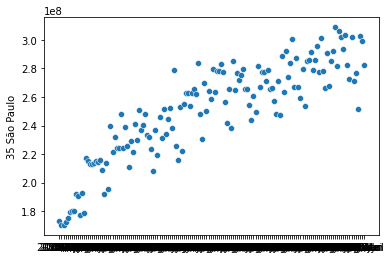

In [ ]:
import seaborn as sns

sns.scatterplot(data=ordenado_por_total.T, x=ordenado_por_total.columns, y='35 São Paulo')

Podemos ver que esse tipo de gráfico não é muito bom para percebermos comportamentos variados ao longo do tempo. Vamos voltar ao gráfico de linhas, bastante utilizado nas aulas anteriores. Mas antes, vamos criar uma nova variável, `mensal`, que terá os dados do dataframe `ordenado_por_total`, mas transpostos.

In [ ]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,15 Pará,21 Maranhão,32 Espírito Santo,24 Rio Grande do Norte,25 Paraíba,53 Distrito Federal,50 Mato Grosso do Sul,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
2008/Fev,1.728349e+08,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,1.704818e+08,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,1.702783e+08,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,1.724022e+08,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,1.754166e+08,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


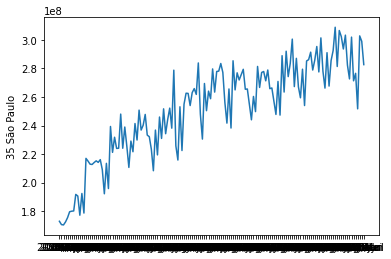

In [ ]:
sns.lineplot(data=mensal, x=mensal.index, y='35 São Paulo')

Agora os dados podem ser melhores visualizados. Mas para deixar o gráfico entendível, precisamos fazer algumas mudanças, como alterar os sticks dos eixos, colocar legenda... Vamos aumentar o tamanho do gráfico também

Vamos trabalhar primeiramente a sticker do eixo x. Podemos rotacionar ela com o comando `plt.xticks(rotation=45)`. [aqui você encontra](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) mais opções dessa função.

Além disso, podemos espacionar melhor as sticks de maneira que fique legível. O matplotlib tem uma maneira de fazer isso também, usando `ax.xaxis.set_major_locator`. `ax` no caso é o objeto que carrega as informações do gráfico. [Aqui](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html) você encontra várias maneiras de espaçar essas ticks. O espaçamento é feito de forma automática usando `tick.AutoLocator()`

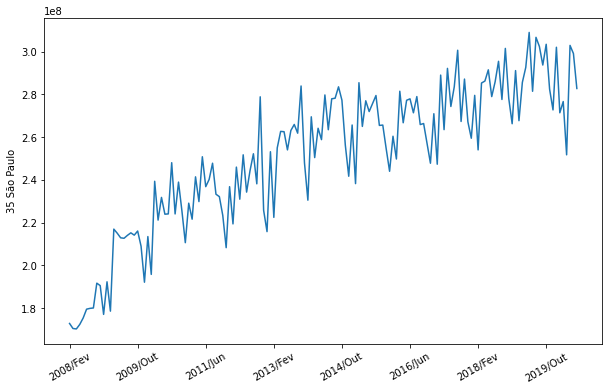

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='35 São Paulo')
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation=30)
plt.show()

Mas em muitos casos o AutoLocator não é bom, como nesse caso. O ideal seria termos os ticks espaçados por períodos mais comuns, como de ano em ano. Para escolhermos o espaçamento, utilizamos o `IndexLocator()`. Ainda vamos colocar um grid para melhor indentificação dos valores.

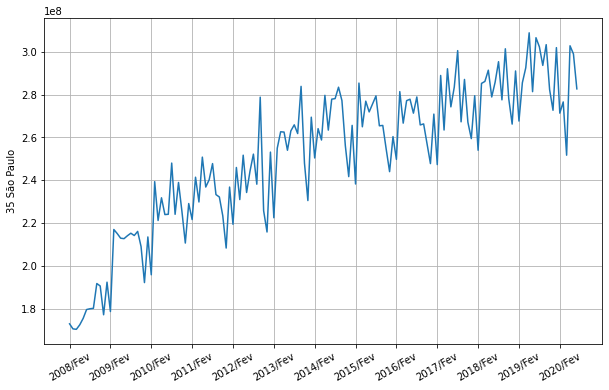

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='35 São Paulo')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation=30)
plt.grid()

plt.show()

Por fim, vamos mudar os limites do eixo y, para evitar más interpretações

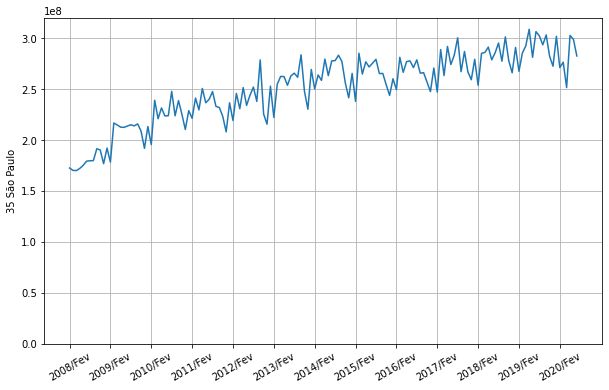

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='35 São Paulo')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation=30)
plt.grid()
plt.ylim(0,3.2e8)

plt.show()

## Desafios:

Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

### Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

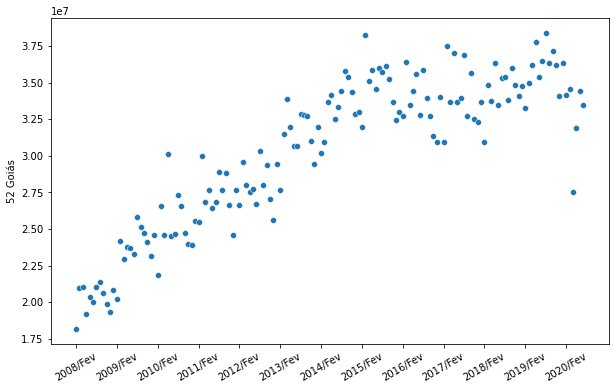

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=ordenado_por_total.T, x=ordenado_por_total.columns, y='52 Goiás')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.xticks(rotation=30)
plt.show()

Podemos alterar o tamanho dos pontos com o parâmetro `s` e também alterar a cor com o parâmetro `color`

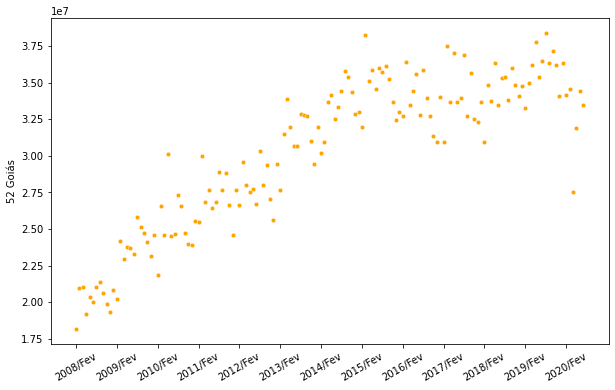

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=ordenado_por_total.T, x=ordenado_por_total.columns, y='52 Goiás', s=20, color='orange')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.xticks(rotation=30)
plt.show()

Outros parâmetros também são encontrados na [documentação](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Mas a maiorira deles é para lidar com categorias, que não é o caso do nosso dos dados do nosso dataframe.

### Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

Além do `StrMethodFormatter`, temos o modo `EngFormattter`, que deixa as ticks com formatação de engenharia, que coloca 'M' indentificando a unidade em milhões. Além dessas, há muitas opções [aqui](https://matplotlib.org/stable/api/ticker_api.html).

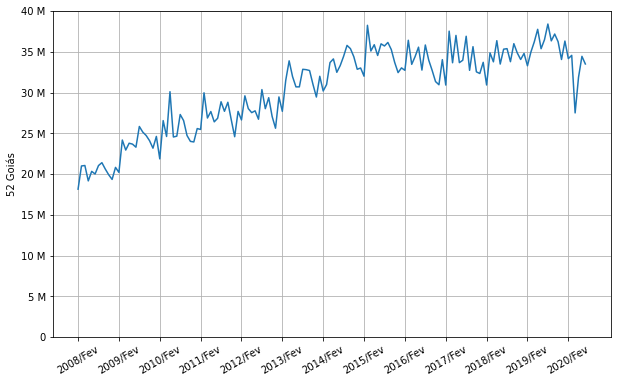

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='52 Goiás')

ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.xticks(rotation=30)
plt.grid()
plt.ylim(0,4e7)

plt.show()

Mas com o `StrMethodFormatter` podemos formatar a stick da maneira que quisermos. Vamos dividir os dados por milhão para formatar em milhões.
Terminando o desafio, também colocaremos título e nomeação nos eixos.

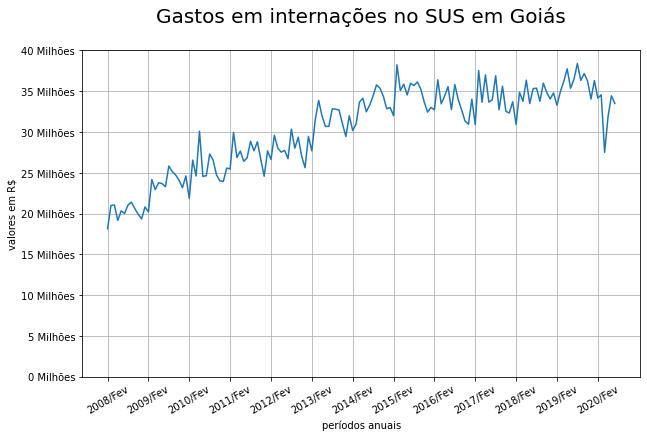

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal/1e6, x=mensal.index, y='52 Goiás')

ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f} Milhões'))
plt.xticks(rotation=30)
plt.grid()
plt.ylim(0,40)
plt.ylabel('valores em R$')
plt.xlabel('períodos anuais')
plt.title('Gastos em internações no SUS em Goiás\n', size=20)

plt.show()